In [4]:
%pylab inline
import matplotlib.pyplot as plt
#pylab.rcParams['figure.figsize'] = (8.0, 15.0)
from numpy import *
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [23]:
def plot_dihedral(phi,phase_phi,psi,phase_psi):
    #phi amplitude of phi
    #phase_phi  phases of phi
    #same for psi and phase_psi
    angles = linspace(0,180,1000)
    #first keep original phi and psi values 
    original_phi = []
    original_psi = []
    for angle in angles:
        phi_val = 0.0 + 0.27*(1 + math.cos(angle*2.0)) + 0.42*(1+math.cos(angle*3)) + 0.0
        original_phi.append(phi_val)
        psi_val = 0.45*(1+math.cos(angle*1.0 - math.pi)) + 1.58*(1+math.cos(angle*2.0 - math.pi)) + 0.55*(1+math.cos(angle*3.0 -
                    math.pi)) + 0.0
        original_psi.append(psi_val)

    min_o_phi = min(original_phi)
    new_o_phi = []
    for o_phi in original_phi:
        value = o_phi - min_o_phi
        new_o_phi.append(value)
        
    min_o_psi = min(original_psi)
    new_o_psi = []
    for o_psi in original_psi:
        value = o_psi - min_o_psi
        new_o_psi.append(value)        
    #nw the fit values
    fit_phi = []
    val_phi = 0
    fit_psi = []
    val_psi = 0
    multi_phi = len(phi)
    multi_psi = len(psi)
    #calculate phi
    for i in range(1,multi_phi+1,1):
        if not val_phi:
            for angle in angles:
                val_phi = phi[i-1]/2*(1+math.cos(angle*i - phase_phi[i-1]))
                fit_phi.append(val_phi)
        else:
            for x,angle in enumerate(angles,0):
                fit_phi[x] += phi[i-1]/2*(1+math.cos(angle*i - phase_phi[i-1]))
    #calculate psi
    for i in range(1,multi_phi+1,1):
        if not val_psi:
            for angle in angles:
                val_psi = psi[i-1]/2*(1+math.cos(angle*i - phase_psi[i-1]))
                fit_psi.append(val_psi)
        else:
            for x,angle in enumerate(angles,0):
                fit_psi[x] += psi[i-1]/2*(1+math.cos(angle*i - phase_psi[i-1]))


    min_f_phi = min(fit_phi)
    new_f_phi = []
    for f_phi in fit_phi:
        value = f_phi - min_f_phi
        new_f_phi.append(value)
        
    min_f_psi = min(fit_psi)
    new_f_psi = []
    for f_psi in fit_psi:
        value = f_psi - min_f_psi
        new_f_psi.append(value)
        
    #plot everything
    fig,ax = plt.subplots(figsize=[15,10])
    color=sbn.color_palette()
    marker=['^','v','o','8']
    ax.plot(angles,new_o_phi,color=color[0],label="Original $\Phi$")
    ax.plot(angles,new_f_phi,color=color[1],label="Fitted $\Phi$")
    plt.xlabel("Angles / deg",fontsize=20)
    plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(0,90)
    #plt.xlim(0,360)
    #plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),fontsize=20)
    ax.legend(loc='center left' , bbox_to_anchor=(1.0, 0.1),ncol=1, fancybox=True, shadow=True,fontsize=20)
    plt.title("Comparison between Original and Fitted $\Phi$",fontsize=20)
    plt.tight_layout()

    fig,ax = plt.subplots(figsize=[15,10])
    color=sbn.color_palette()
    marker=['^','v','o','8']
    ax.plot(angles,new_o_psi,color=color[0],label="Original $\Psi$")
    ax.plot(angles,new_f_psi,color=color[1],label="Fitted $\Psi$")
    plt.xlabel("Angles / deg",fontsize=20)
    plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(0,90)
    #plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),fontsize=20)
    ax.legend(loc='center left' , bbox_to_anchor=(1.0, 0.1),ncol=1, fancybox=True, shadow=True,fontsize=20)
    plt.title("Comparison between Original and Fitted $\Psi$",fontsize=20)
    plt.tight_layout()

    
    print("Original amplitude  $\Phi$ / kcal mol$^{-1}$")
    print("0.000,0.2700,0.4200,0.000")
    print("Fitted amplitude $\Phi$")
    outline=""  
    for val in phi:
        outline+="%.4f," % val
    print(outline)
    

    print("Original amplitude  $\Psi$ / kcal mol$^{-1}$")
    print("0.450,1.5800,0.5500,0.000")
    print("Fitted amplitude $\Psi$")
    outline=""
    for val in psi:
        outline+="%.4f," % val
    print(outline)
    
    #return fit_phi,fit_psi


Original amplitude  $\Phi$ / kcal mol$^{-1}$
0.000,0.2700,0.4200,0.000
Fitted amplitude $\Phi$
3.1216,1.2408,-1.6015,0.4183,
Original amplitude  $\Psi$ / kcal mol$^{-1}$
0.450,1.5800,0.5500,0.000
Fitted amplitude $\Psi$
0.0180,0.9988,0.1437,-0.0826,


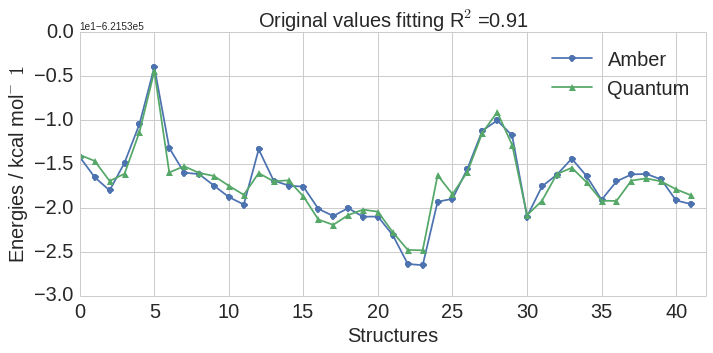

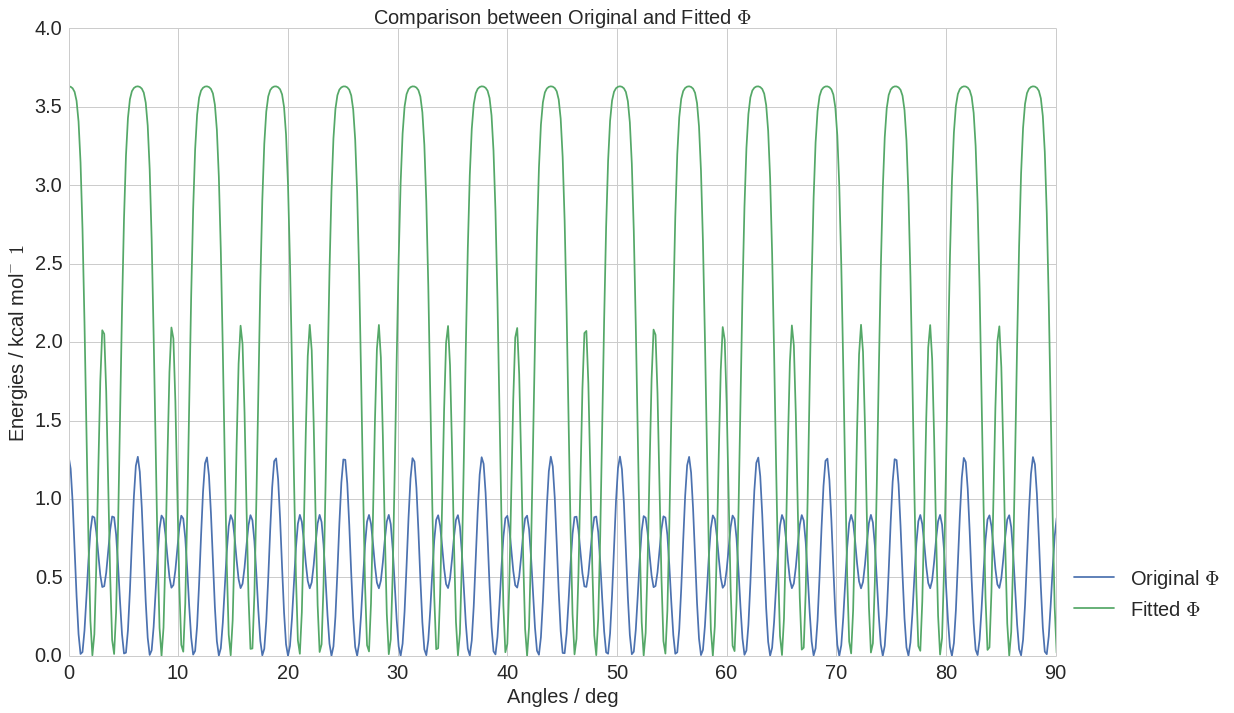

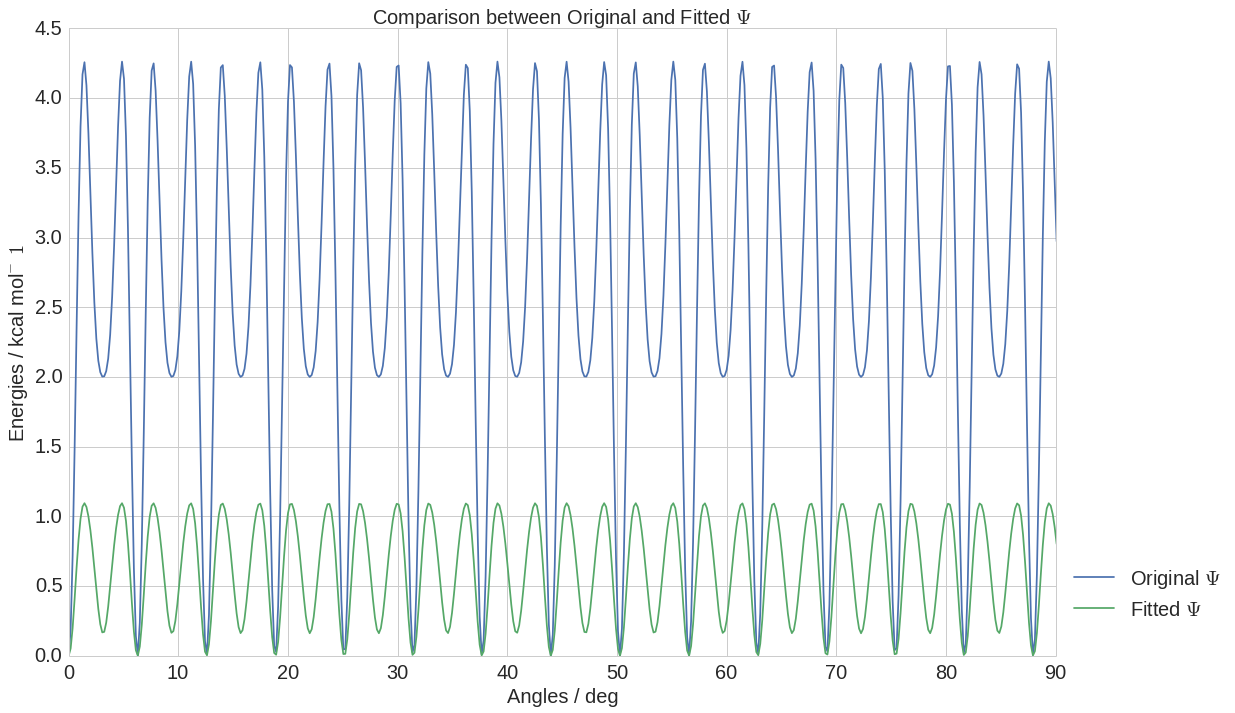

In [24]:
#open the amber vs quantum energies, use cols 0 (numb of structures) 1 (Amber) and 2(Gaussian) to have the energies values
energies = loadtxt("original/amber_quantum_fit.dat",usecols=[0,1,2],skiprows=1)
#these are the energies + offset
#now plot them
fig,ax = plt.subplots(figsize=[10,5])
color = sbn.color_palette()
marker = ['o', '^']
ax.plot(energies[:,0],energies[:,1],color=color[0],marker=marker[0],label="Amber")
ax.plot(energies[:,0],energies[:,2],color=color[1],marker=marker[1],label="Quantum")
plt.xlabel("Structures",fontsize=20)
plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,42)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),fontsize=20)
plt.legend(loc="best",fontsize=20)
plt.title("Original values fitting R$^2$=0.91",fontsize=20)
plt.tight_layout()

phi = [3.1216,1.2408,-1.6015,0.4183]
phase_phi = [0,0,0,0]
psi = [0.0180,0.9988,0.1437,-0.0826]
phase_psi = [math.pi,math.pi,math.pi,0.0]
plot_dihedral(phi,phase_phi,psi,phase_psi)


Original amplitude  $\Phi$ / kcal mol$^{-1}$
0.000,0.2700,0.4200,0.000
Fitted amplitude $\Phi$
3.0817,1.0305,-1.8060,
Original amplitude  $\Psi$ / kcal mol$^{-1}$
0.450,1.5800,0.5500,0.000
Fitted amplitude $\Psi$
-0.5830,0.5260,-0.4594,


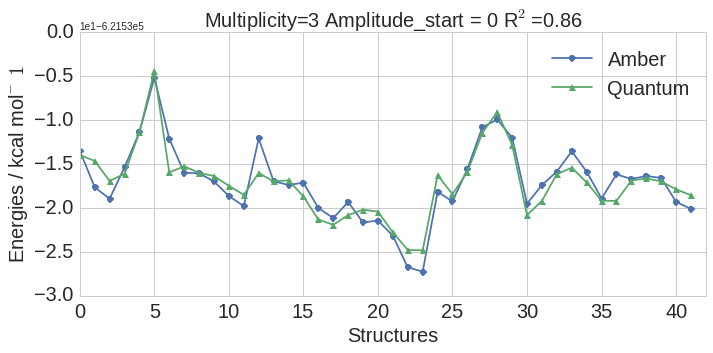

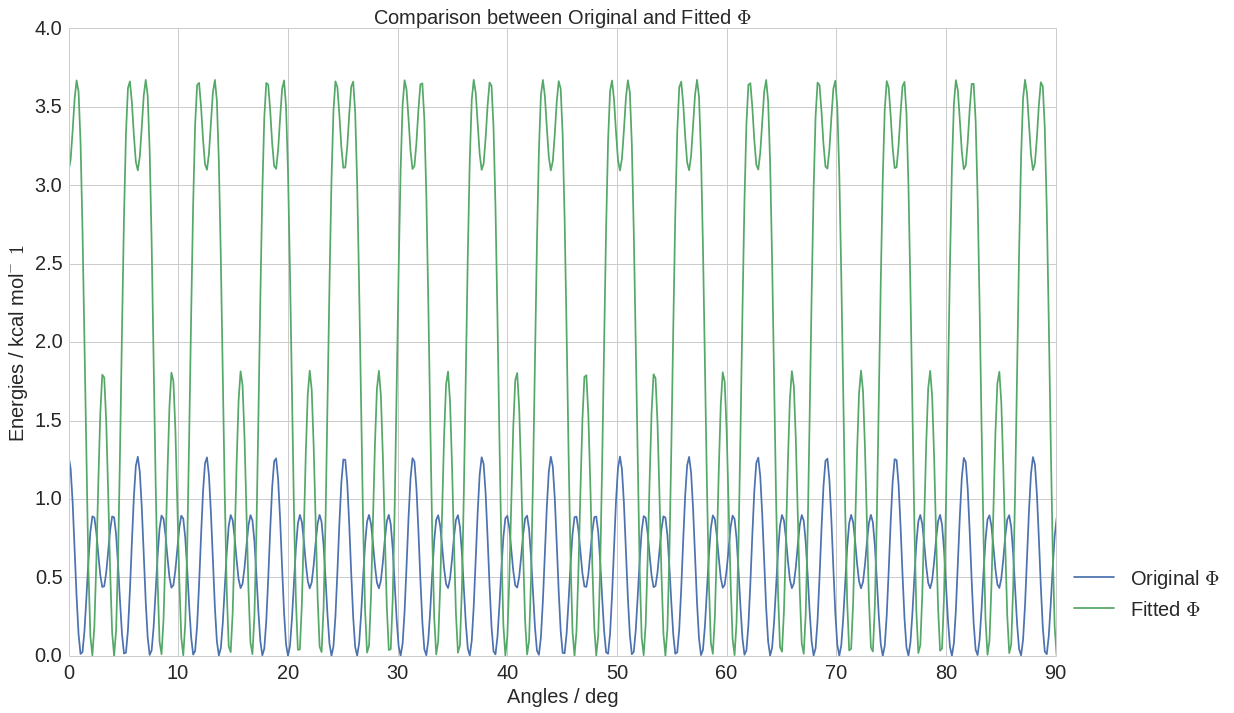

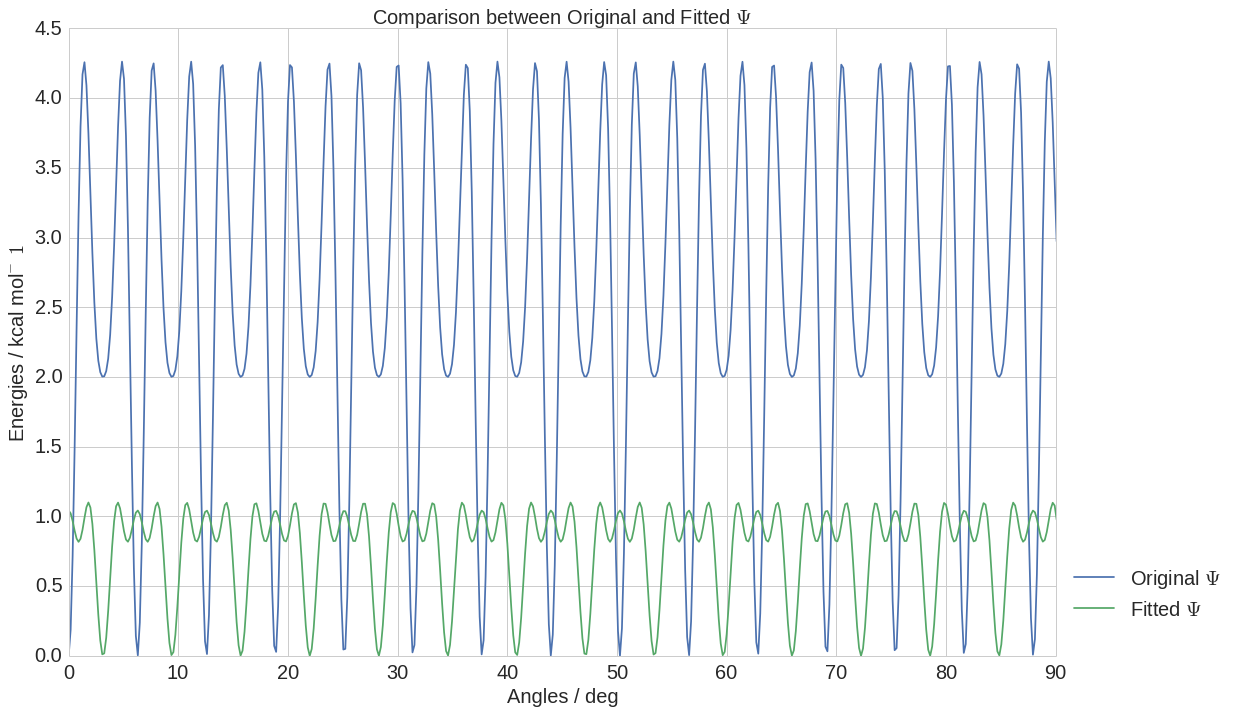

In [25]:
#open the amber vs quantum energies, use cols 0 (numb of structures) 1 (Amber) and 2(Gaussian) to have the energies values
energies = loadtxt("multiplicity_3/amber_quantum_fit.dat",usecols=[0,1,2],skiprows=1)
#these are the energies + offset
#now plot them
fig,ax = plt.subplots(figsize=[10,5])
color = sbn.color_palette()
marker = ['o', '^']
ax.plot(energies[:,0],energies[:,1],color=color[0],marker=marker[0],label="Amber")
ax.plot(energies[:,0],energies[:,2],color=color[1],marker=marker[1],label="Quantum")
plt.xlabel("Structures",fontsize=20)
plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,42)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),fontsize=20)
plt.legend(loc="best",fontsize=20)
plt.title("Multiplicity=3 Amplitude_start = 0 R$^2$=0.86",fontsize=20)
plt.tight_layout()

phi = [3.0817,1.0305,-1.8060]
phase_phi = [0,0,0]
psi = [-0.5830,0.5260,-0.4594]
phase_psi = [math.pi,math.pi,math.pi]
plot_dihedral(phi,phase_phi,psi,phase_psi)

Original amplitude  $\Phi$ / kcal mol$^{-1}$
0.000,0.2700,0.4200,0.000
Fitted amplitude $\Phi$
3.3823,1.8725,-1.4094,
Original amplitude  $\Psi$ / kcal mol$^{-1}$
0.450,1.5800,0.5500,0.000
Fitted amplitude $\Psi$
0.6953,1.7033,0.7751,


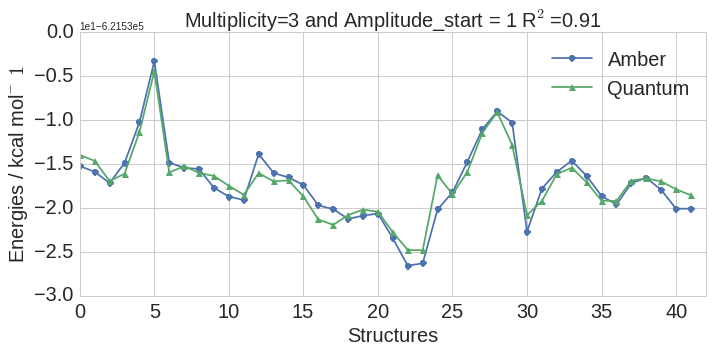

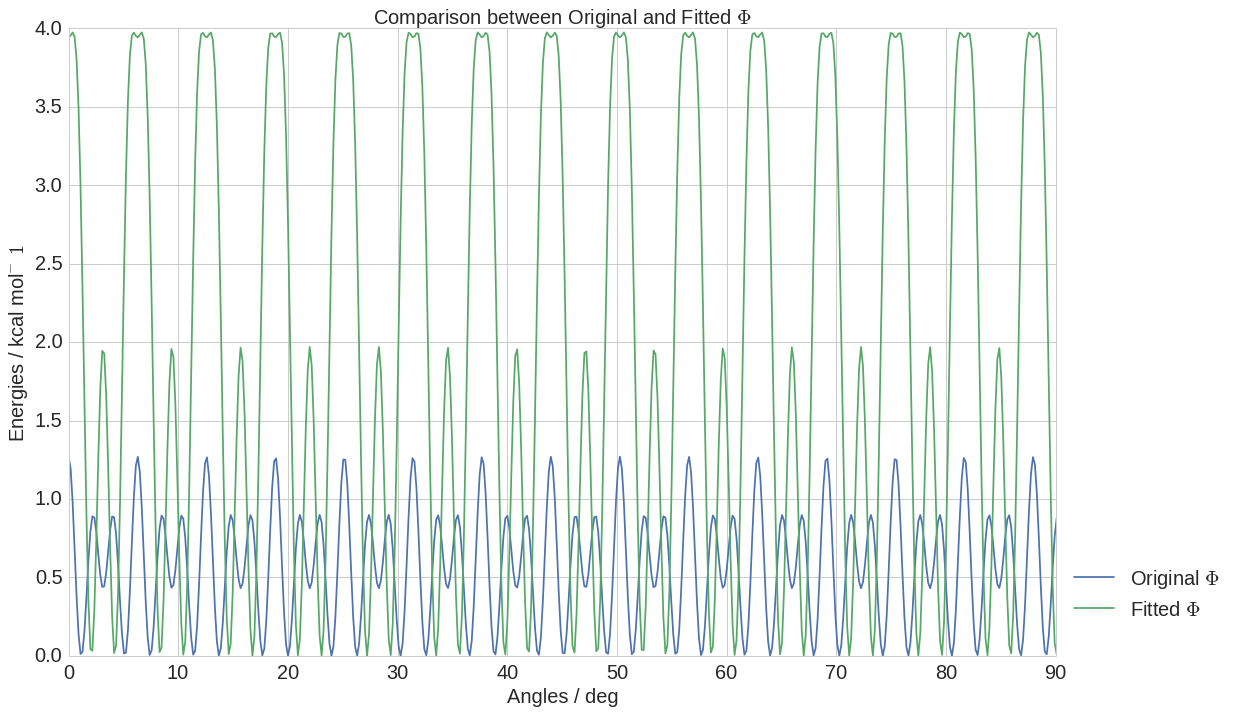

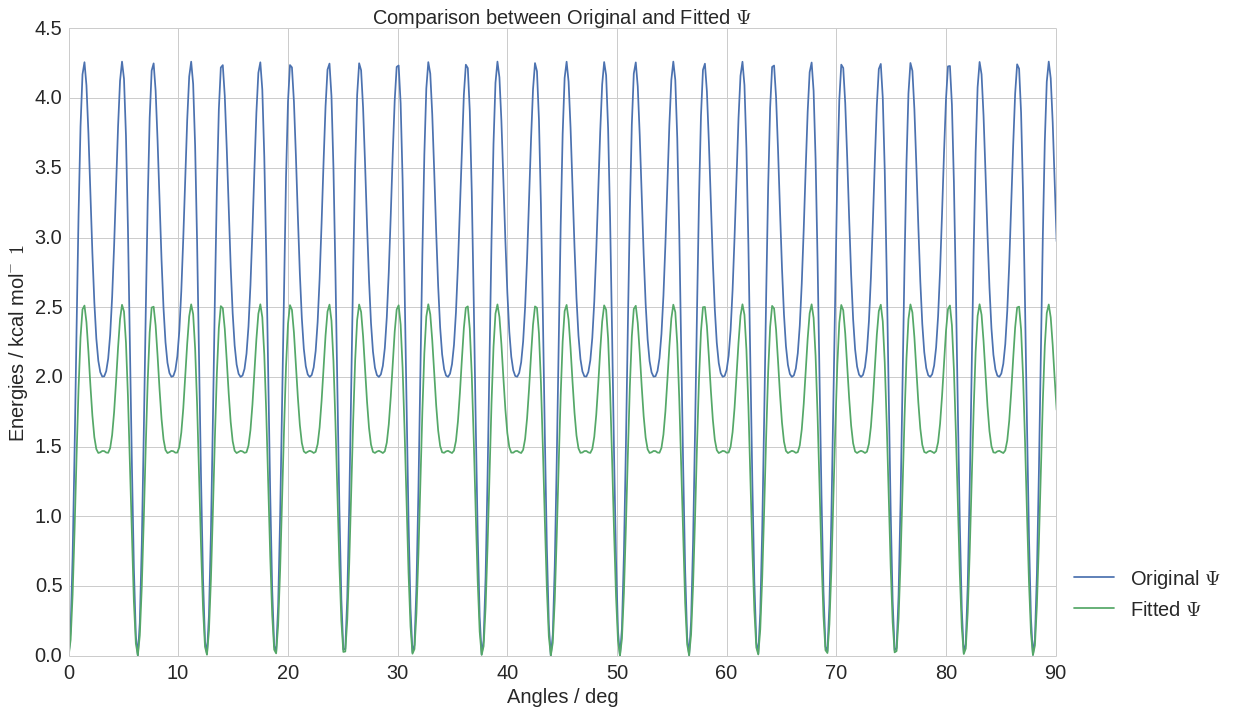

In [26]:
#open the amber vs quantum energies, use cols 0 (numb of structures) 1 (Amber) and 2(Gaussian) to have the energies values
energies = loadtxt("multiplicity_3_amplitude_1/amber_quantum_fit.dat",usecols=[0,1,2],skiprows=1)
#these are the energies + offset
#now plot them
fig,ax = plt.subplots(figsize=[10,5])
color = sbn.color_palette()
marker = ['o', '^']
ax.plot(energies[:,0],energies[:,1],color=color[0],marker=marker[0],label="Amber")
ax.plot(energies[:,0],energies[:,2],color=color[1],marker=marker[1],label="Quantum")
plt.xlabel("Structures",fontsize=20)
plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,42)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),fontsize=20)
plt.legend(loc="best",fontsize=20)
plt.title("Multiplicity=3 and Amplitude_start = 1 R$^2$=0.91",fontsize=20)
plt.tight_layout()

phi = [3.3823,1.8725,-1.4094]
phase_phi = [0,0,0]
psi = [0.6953,1.7033,0.7751]
phase_psi = [math.pi,math.pi,math.pi]
plot_dihedral(phi,phase_phi,psi,phase_psi)


Original amplitude  $\Phi$ / kcal mol$^{-1}$
0.000,0.2700,0.4200,0.000
Fitted amplitude $\Phi$
3.6829,2.7144,-1.0129,
Original amplitude  $\Psi$ / kcal mol$^{-1}$
0.450,1.5800,0.5500,0.000
Fitted amplitude $\Psi$
1.9735,2.8806,2.0097,


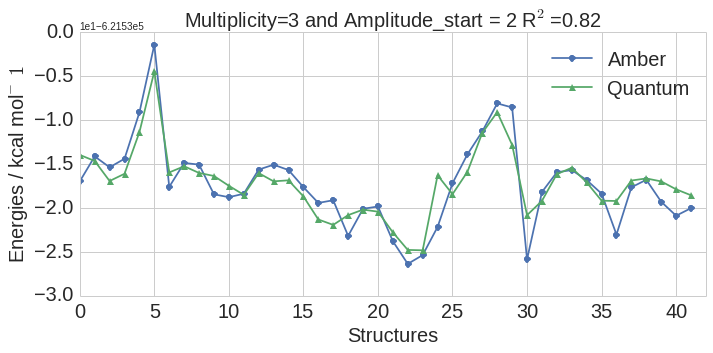

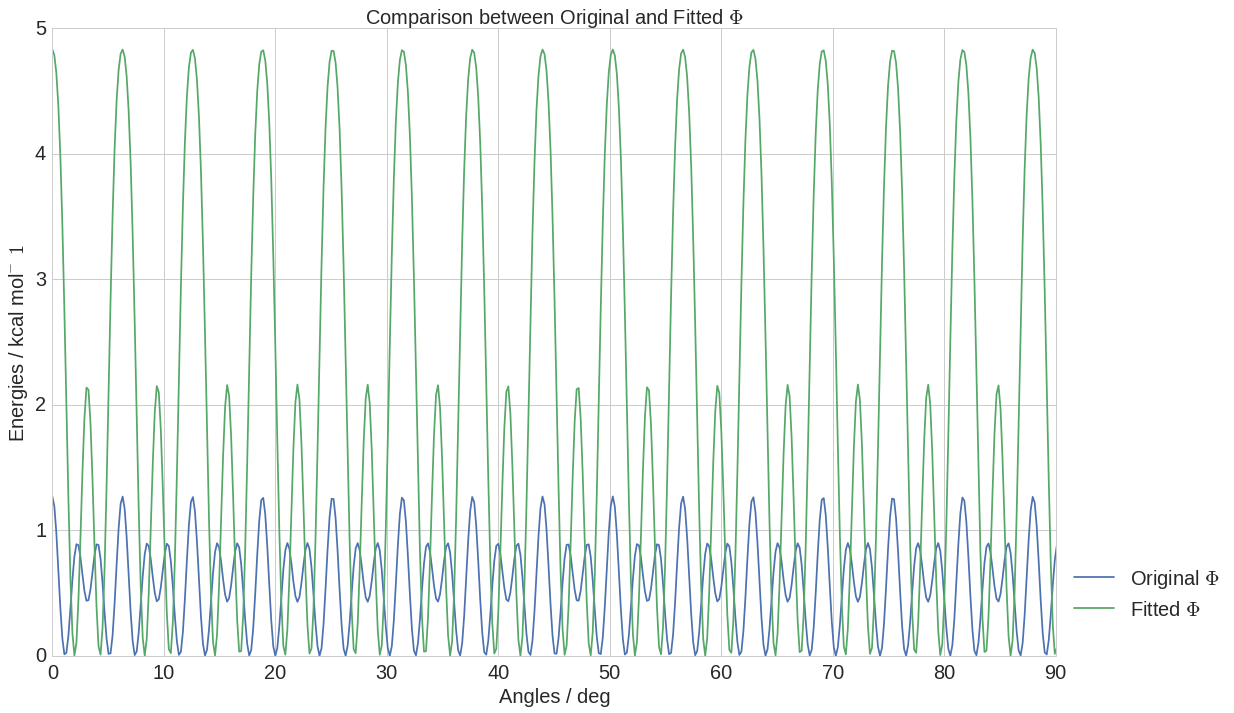

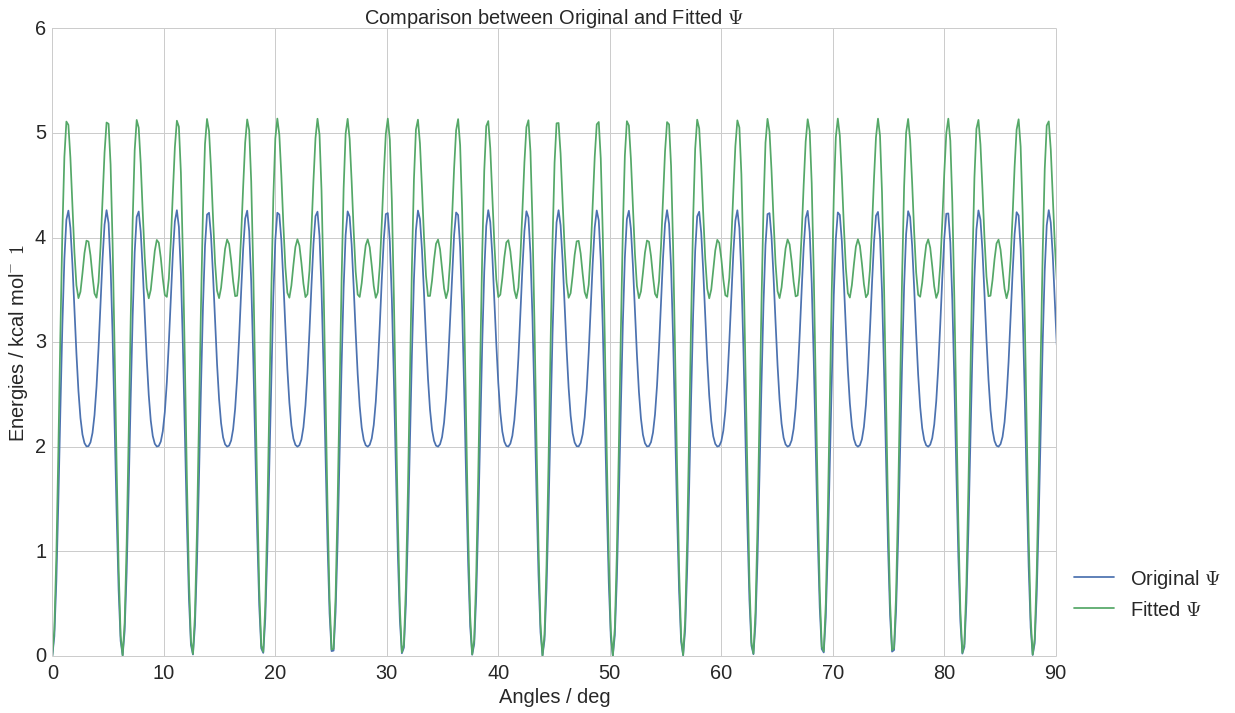

In [27]:
#open the amber vs quantum energies, use cols 0 (numb of structures) 1 (Amber) and 2(Gaussian) to have the energies values
energies = loadtxt("multiplicity_3_amplitude_2/amber_quantum_fit.dat",usecols=[0,1,2],skiprows=1)
#these are the energies + offset
#now plot them
fig,ax = plt.subplots(figsize=[10,5])
color = sbn.color_palette()
marker = ['o', '^']
ax.plot(energies[:,0],energies[:,1],color=color[0],marker=marker[0],label="Amber")
ax.plot(energies[:,0],energies[:,2],color=color[1],marker=marker[1],label="Quantum")
plt.xlabel("Structures",fontsize=20)
plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,42)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),fontsize=20)
plt.legend(loc="best",fontsize=20)
plt.title("Multiplicity=3 and Amplitude_start = 2 R$^2$=0.82",fontsize=20)
plt.tight_layout()

phi = [3.6829,2.7144,-1.0129]
phase_phi = [0,0,0]
psi = [1.9735,2.8806,2.0097]
phase_psi = [math.pi,math.pi,math.pi]
plot_dihedral(phi,phase_phi,psi,phase_psi)
